![title](https://pythonawesome.com/content/images/2018/05/scikit-learn.png)

In [1]:
import pandas as pd
import numpy as np
import copy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import datasets
from sklearn.cluster import KMeans, SpectralClustering, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.utils.multiclass import unique_labels

# Unsupervised Learning

Until now, we have explored supervised learning algorithm, _i.e._ we were in the presence of "right answers" labelling training data.

Now we want to focus on unsupervised learning algorithms, and in particular on the class of __clustering algorithms__.
We do not have labels on data, and we look for a way to put together data and make the algorithm assign them to a same class.

## K-means algorithm

There are tons of very fancy and efficient clustering algorithms, but probably the easiest one to explain and understand is $K$-means.

The k-means algorithm searches for a pre-determined number of clusters (usually denoted as $k$) within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

* The "cluster center" also called __centroid__ is the arithmetic mean of all the points belonging to the cluster.
* Each point is closer to its own __centroid__ than to other cluster centers.

Those two assumptions are the basis of the k-means model. 

Before diving into details of the algorithm, let's see how it works on the famous iris dataset. We leave labels out, since we are in an unsupervised learning situation.

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
X = np.array(df_iris.loc[:, iris.feature_names])

In [3]:
km = KMeans(n_clusters=3) # We already know the number of clusters in this case
km.fit(X);

In [4]:
y_kmeans = km.predict(X)

We can now plot the result. Furthermore, making use of `cluster_centers_` attribute of the estimator, we can get the centroid coordinates.

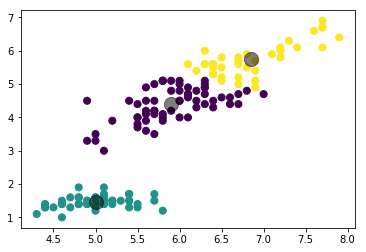

In [5]:
plt.scatter(X[:, 0], X[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);

## Silhouette analysis

An important feature of $k$-means is that one has to choose in advance the number of clusters we use to classify the dataset.
One can easily image that on a dataset of $1000$ observations $k=1$ and $k=1000$ are poor choices, hardly adding new informations to our knowledge. 
Leaving aside these extramal cases, how one can answer to the question __which is the "right" number of clusters?__

[Silhouette][1]  refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.

Silhouette is a way to measure how close each point in a cluster is to the points in its neighboring clusters. Its a neat way to find out the optimum value for $k$ during $k$-means clustering. Silhouette values lies in the range of $[-1, 1]$. A value of $+1$ indicates that the sample is far away from its neighboring cluster and very close to the cluster its assigned. Similarly, value of $-1$ indicates that the point is close to its neighboring cluster than to the cluster its assigned. And, a value of $0$ means its at the boundary of the distance between the two cluster. Value of $+1$ is ideal and $-1$ is least preferred. Hence, higher the value better is the cluster configuration.

The silhouette score can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

[1]: https://en.wikipedia.org/wiki/Silhouette_(clustering)

### Mathematical definition

For an example $i$ in the data, lets define $a_i$ to be the mean distance of point $i$ w.r.t to all the other points in the cluster its assigned $A$. We can interpret $a_i$ as a measure of how well the point is assigned to the cluster. Smaller the value better the assignment.

Similarly, lets define $b_i$ to be the mean distance of point $i$ w.r.t. to other points to its closet neighbouring cluster $B$. The cluster $B$ is the cluster to which point $i$ is not assigned to but its distance is closest amongst all other cluster.

Then, we define the __silhouette__ $s_i$ as

$$ s_i := \frac{b_i - a_i}{\max(b_i, a_i)}\, . $$

For $s_i$ to be close to $1$, $a_i$ has to be very small as compared to $b_i$, _i.e._ $a_i << b_i$.
This happens when $a_i$ is very close to its assigned cluster. 

A large value of $b_i$ implies its extremely far from its next closest cluster. 

Hence, $s_i = 1$ indicates that the data set $i$ is well matched in the cluster assignment.

In other words, we state 

> A good clustering algorithm is the one producing low intra-cluster distances and high inter-cluster distances.

This gives us a way to discriminate between different cluster algorithms.
The best one is the one with same cluster points really close and clusters really far between them.

![](https://slideplayer.com/slide/4829376/15/images/2/The+Problem+of+Clustering.jpg)

### Work on an example

Here we give the `sklearn` implementation of silhouette analysis.

In [6]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972867
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048
For n_clusters = 6 The average silhouette_score is : 0.3678464984712235
For n_clusters = 7 The average silhouette_score is : 0.3588294450965675
For n_clusters = 8 The average silhouette_score is : 0.34901133143367136


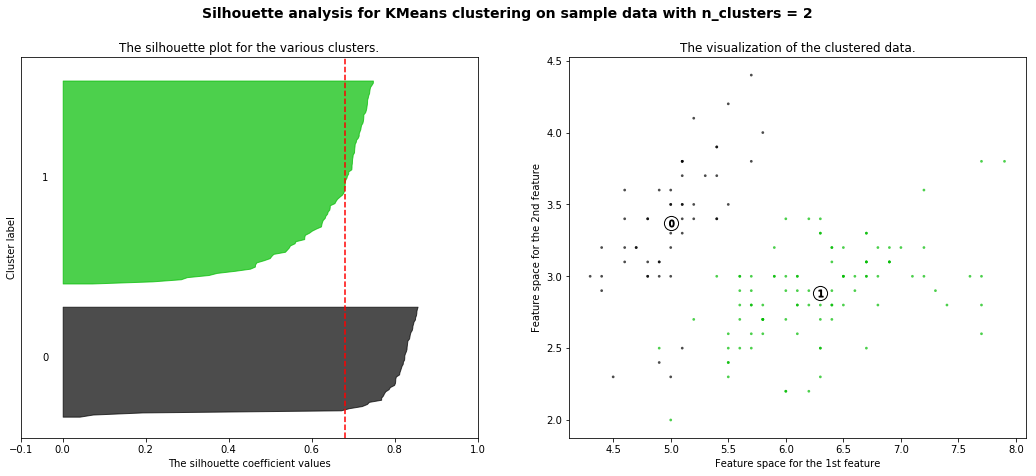

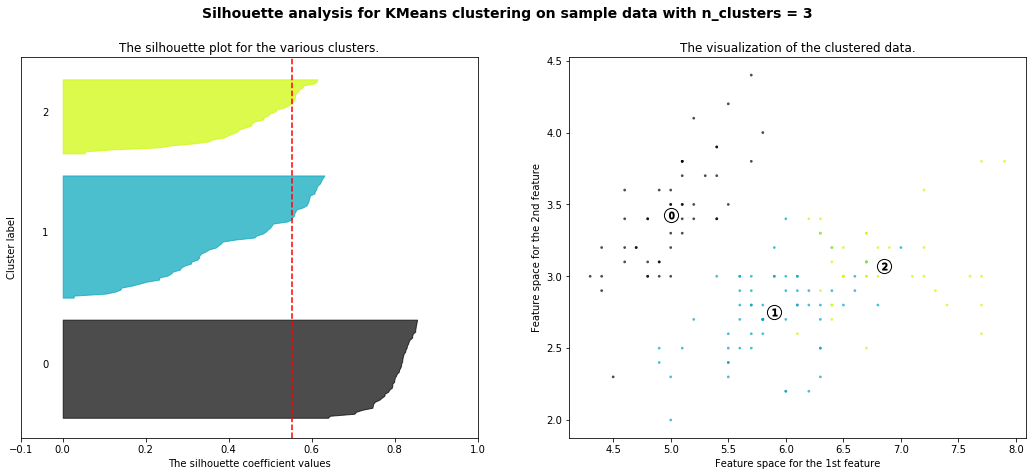

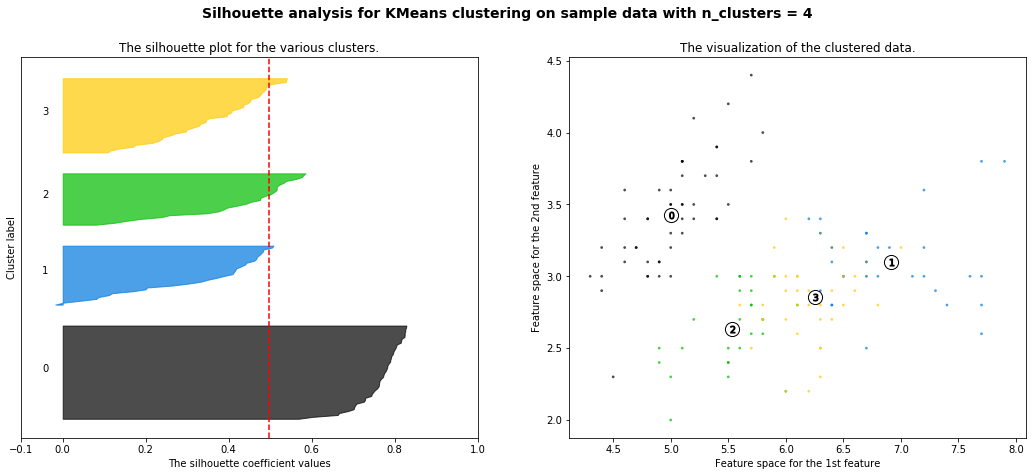

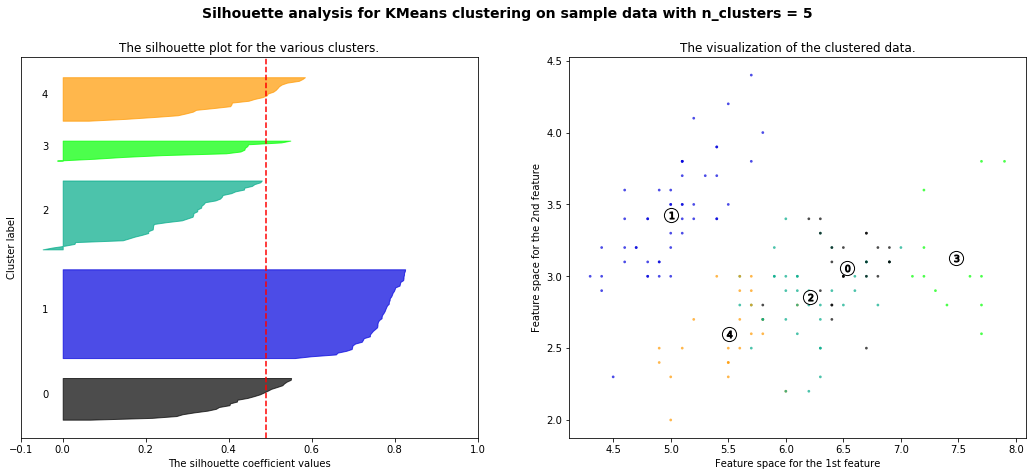

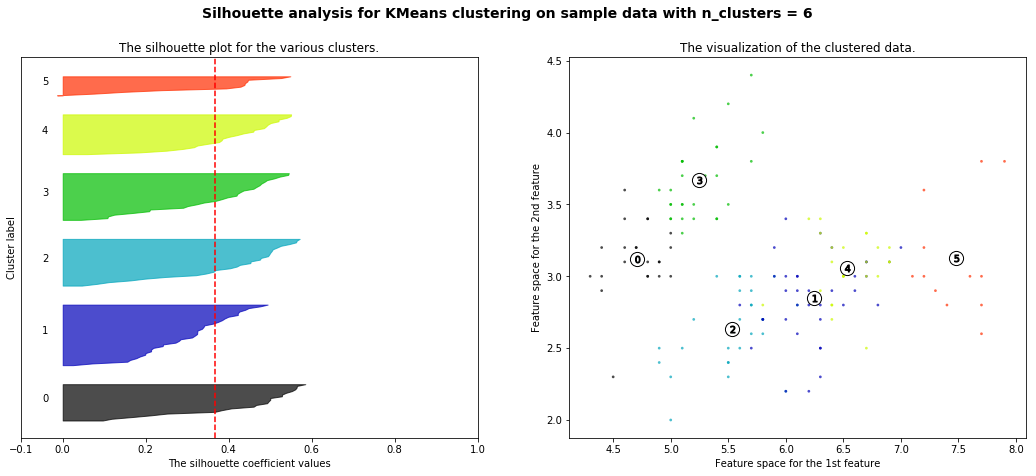

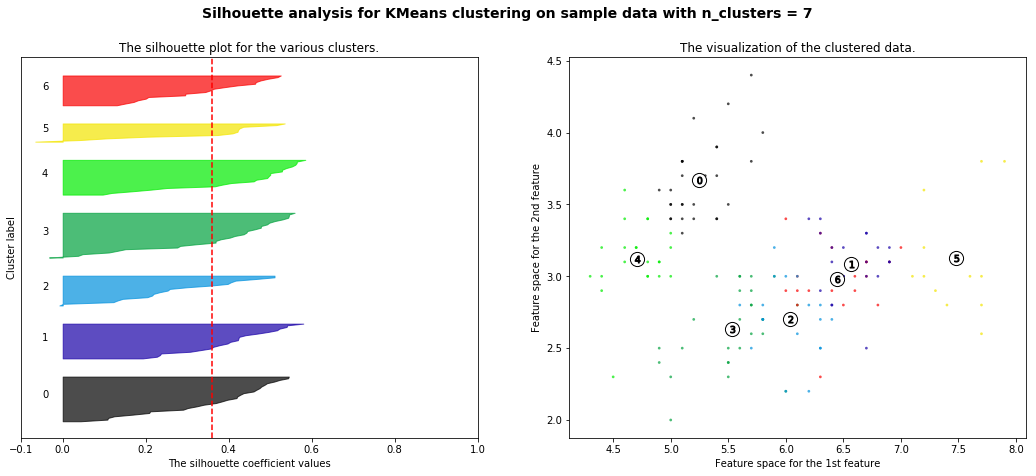

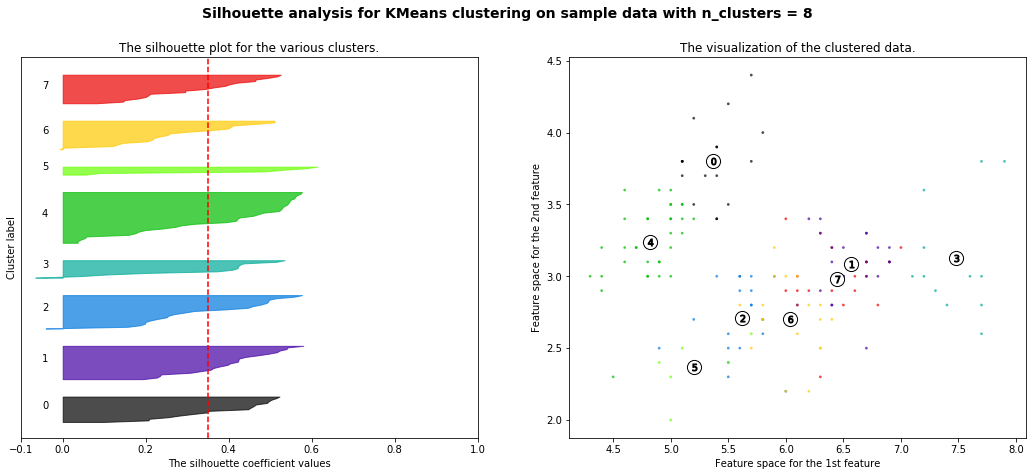

In [7]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Excercise

Apply silhouette analysis to [this dataset](https://www.kaggle.com/arjunbhasin2013/ccdata/downloads/CC%20GENERAL.csv/1) and use your result to solve the following exercise.

> Develop a _customer segmentation_ to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

## Observations

Some things to take note of though:

* $k$-means clustering is very sensitive to scale due to its reliance on Euclidean distance so be sure to normalize data if there are likely to be scaling problems.
* If there are some symmetries in your data, some of the labels may be mis-labelled
* It is recommended to do the same $k$-means with different initial centroids and take the most common label.

### Non-linear geometries

One important issue affecting $k$-means is that such algorithm is limited to linear cluster boundaries.

The fundamental model assumptions of k-means (_points will be closer to their own cluster center than to others_) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between $k$-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical $k$-means approach.

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

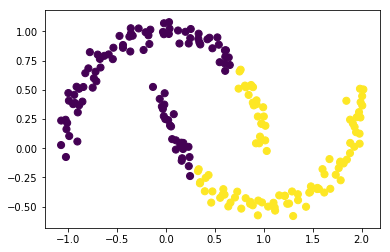

In [9]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

#### How do we fix this?

Well, what we have to do is a so-called __kernel transformation__. 

We are not going to dig into details, but roughly we can schematise the solution into a three-step procedure.

1. Create a similarity graph between our $n$ points to cluster.
2. Compute the first $k$ eigenvectors of its Laplacian matrix to define a feature vector for each object.
3. Run $k$-means over these features, to clusterise into $k$ classes.

For details and interesting and introductive article can be found [here](https://towardsdatascience.com/spectral-clustering-for-beginners-d08b7d25b4d8)

In `sklearn`, the version of this kernelized k-means is implemented within the `SpectralClustering` estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a $k$-means algorithm.

/usr/local/lib/python3.5/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


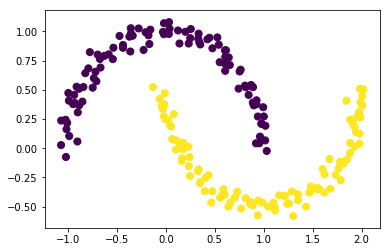

In [10]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Exercise

Try to apply $k$-means to digits dataset.

The aim of the exercise is to identify similar digits without using the original label information. 
You can thin to this as similar to a first step in extracting meaning from a new dataset about which you do not have any _a priori_ label information.

In [11]:
digits = datasets.load_digits()

Recall that the digits consist of $1797$ samples with $64$ features, where each of the $64$ features is the brightness of one pixel in an $8\times8$ image.

In [12]:
digits.data.shape

(1797, 64)

In [14]:
kmeans = # COMPLETE
clusters = # COMPLETE
res = # COMPLETE

print('Your result matrix collecting centroids has dimension:', res)
print('If everything is done correctly you should have obtained 10 clusters in 64 dimensions.')

Your result matrix collecting centroids has dimension: (10, 64)
If everything is done correctly you should have obtained 10 clusters in 64 dimensions.


The result should be $10$ clusters in $64$ dimensions. 

Notice that the cluster centroids themselves are $64$-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster. 

Write a code to plot what these cluster centers look like.

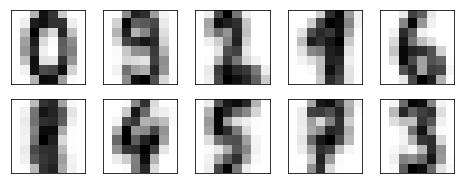

In [15]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

You should obtain an image like the following one.

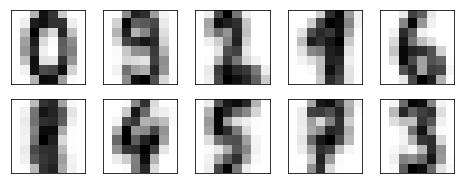

One can see that even without the labels, `KMeans` is able to find clusters whose centers are recognizable digits, with perhaps the exception of $1$ and $8$. And the computational time is really short.

### Bonus 1: calculate accuracy

Because k-means knows nothing about the identity of the cluster, the $0$–$9$ labels may be permuted. 
We can fix this by matching each learned cluster label with the true labels found in them.

In [16]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

This is useful to check how accurate our unsupervised clustering was in finding similar digits within the data.

We can compare our algorithm classification with given labels to calculate the accuracy score.

In [17]:
acc = # COMPLETE

print('Your algorithm accuracy %.2f%%'%(acc*100) )
print('The accuracy should be ~80%' )

Your algorithm accuracy 79.02%
The accuracy should be ~80%


### Bonus 2: plot confusion matrix

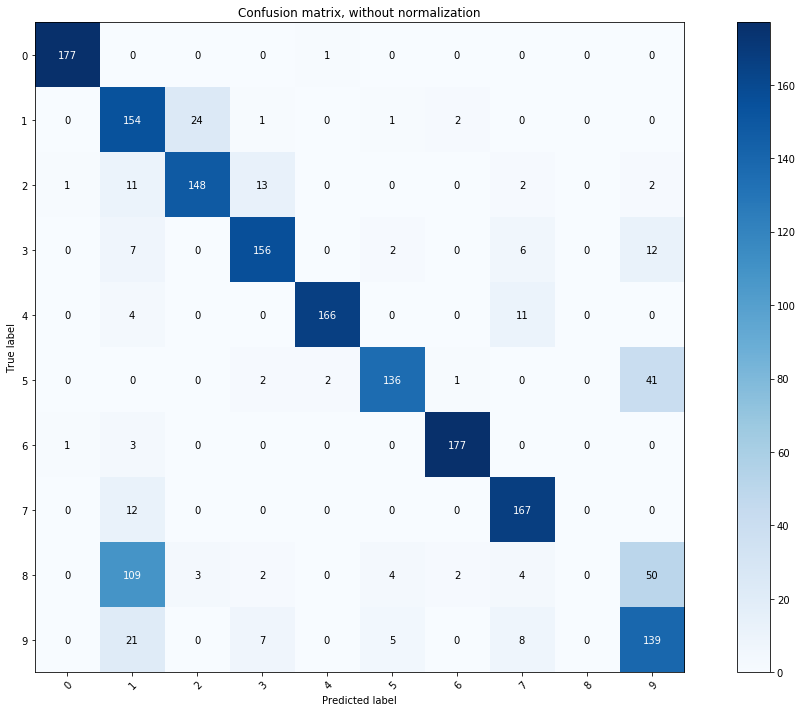

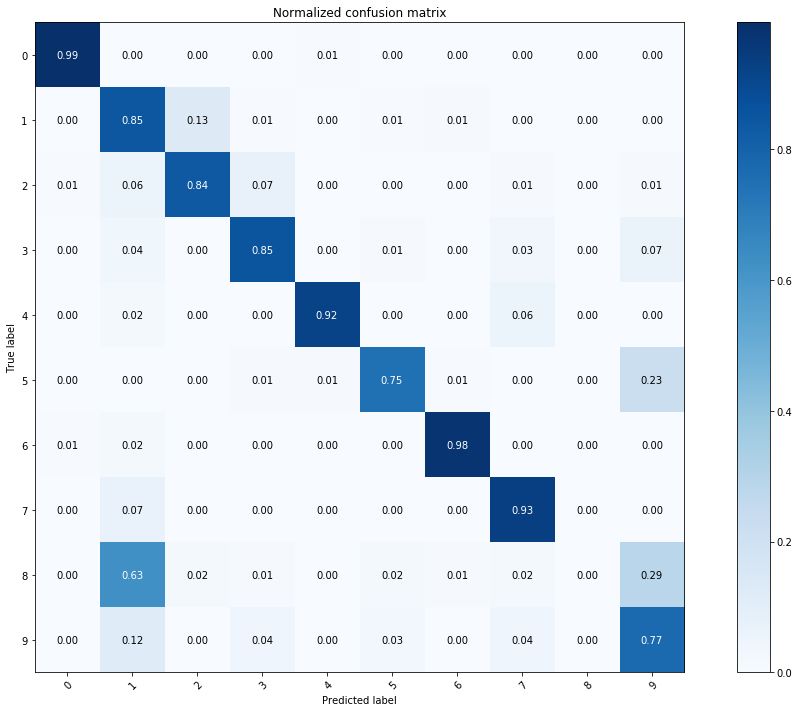

In [18]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams["figure.figsize"] = (15,10) # Change the default figure size
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = # COMPLETE
    # Only use the labels that appear in the data
    classes = # COMPLETE
    
    if normalize:
        cm = # COMPLETE
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(digits.target, labels, classes=digits.target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(digits.target, labels, classes=digits.target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

__Results__: As one might expect from the cluster centers we visualized before, the main point of confusion is between the eights and ones. But this still shows that using $k$-means, we can essentially build a digit classifier without reference to any known labels!

#### t-SNE reduction

We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing k-means. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters. 

In [19]:
# Project the data: this step will take several seconds
tsne = # COMPLETE
digits_proj = # COMPLETE

# Compute the clusters
kmeans = # COMPLETE
clusters = # COMPLETE

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
acc = accuracy_score(digits.target, labels)

print('Your algorithm accuracy %.2f%%'%(acc*100) )
print('The accuracy should be over 90%' )

Your algorithm accuracy 94.60%
The accuracy should be over 90%


That's nearly $95\%$ classification accuracy without using the labels. 

This is the power of unsupervised learning when used carefully: it can extract information from the dataset that it might be difficult to do by hand or by eye.

A further way to rephrase such a lesson is 

> Methods of pre-processing data in a smart way are really powerful and sometimes their application can be crucial to get a good working learning algorithm.

# Final exercises

## Build your own $k$-means

Implement the simplest version of $k$-means in $2$ dimensions and three clusters. 
Be sure the centroids are randomly initialised.

_Note_: You only need `pandas`, `numpy` and `copy` for this. Eventually, `matplotlib` to plot results.

To help you, a brief recall. $k$-means clustering is a clustering algorithm that aims to partition $n$ observations into $k$ clusters.

There are 3 steps:

* __Initialisation__ – $k$ initial “means” (centroids) are generated at random
* __Assignment__ – $k$ clusters are created by associating each observation with the nearest centroid
* __Update__ – The centroid of the clusters becomes the new mean

_Assignment_ and _Update_ are repeated iteratively until convergence.

* __Convergence__ – when no point is re-assigned to a different cluster after a step.

The end result is that the sum of squared errors is minimised between points and their respective centroids.

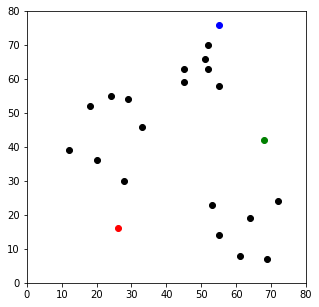

In [21]:
## Initialisation stage

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})


np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

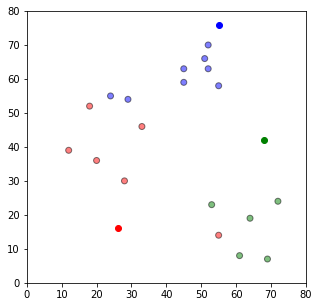

In [22]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = # COMPLETE
        
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [23]:
df.head()

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,36,20.880613,48.373546,53.150729,1,r
2,28,30,14.142136,41.761226,53.338541,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,b


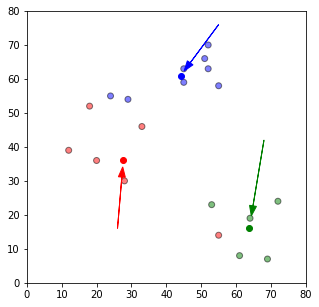

In [24]:
## Update Stage

old_centroids = copy.deepcopy(centroids)

def update(centroids):
    for i in centroids.keys():
        # YOUR CODE HERE
    return centroids

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i]) # arrows to show centroids moving
plt.show()

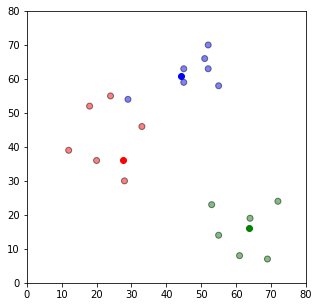

In [25]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

Note that one of the reds is now green and one of the blues is now red.

We are getting closer.

We now repeat until the __convergence condition__ is met. 
> There are no changes to any of the clusters.

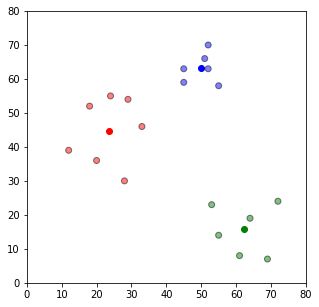

In [24]:
# Continue until all assigned categories do not change anymore
while True:
    closest_centroids = df['closest'].copy(deep=True)
    # YOUR CODE HERE
    
    if # YOUR CODE FOR CONVERGENCE CONDITION:
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

So we have $3$ clear clusters with $3$ centroinds at the centre of these clusters.

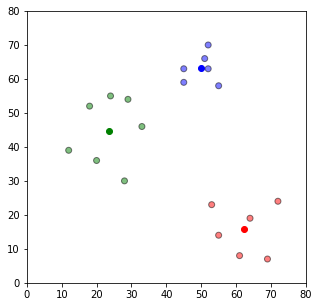

In [26]:
## scikit comparison
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))

colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

This is the plot you should get (modulo clusters colour).

## $k$-means for image compression

The idea of this exercise is to think out of box and use $k$-means for color compression.

In a typical image (you can choose the one you want) with a huge number of colours (_i.e._ $1.6 \times 10^7$ or $16$ million), a large number of such colours will be unused, and many of the pixels in the image will have similar or even identical colors.

The exercise goal is to reduce these $16$ million colours to just $16$ colours, using a $k$-means clustering across the pixel space. 

_IMPORTANT NOTE_: Because we are dealing with a very large dataset, you are strongly adviced to use the mini batch $k$-means, which operates on subsets of the data to compute the result much more quickly than the standard $k$-means algorithm.

_HINT_: An usual image is stored in a three-dimensional array of size `(height, width, RGB)`, the last containing red/blue/green contributions as integers from 0 to 255.
My advice is to view this set of pixels is as a cloud of points in a three-dimensional colour space. In order to get so you should reshape the data to $[n_{samples} \times n_{features}]$, and rescale the colors so that they lie between $0$ and $1$.

Just for the sake of efficiency, to visualize these pixels in the colour space, try to use a subset of $10000$ pixels.

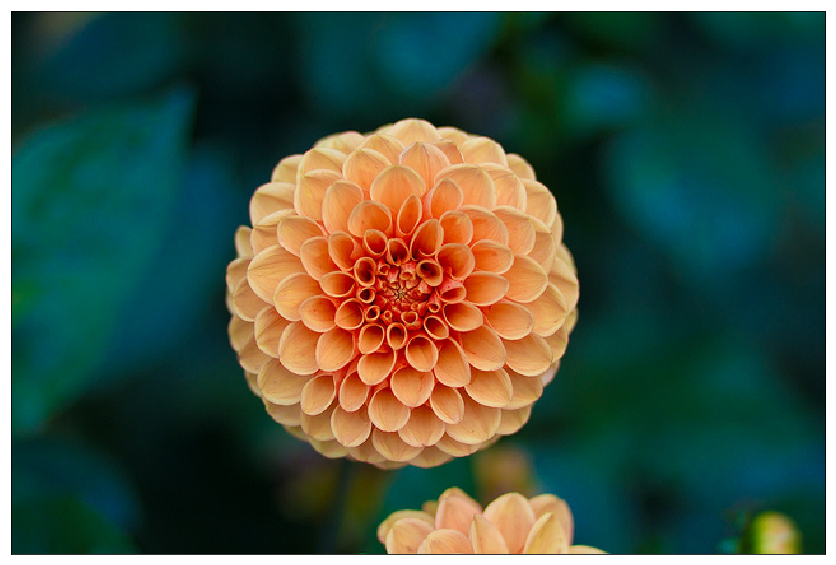

In [27]:
flower = datasets.load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [28]:
flower.shape

(427, 640, 3)

Reshape and rescale

In [31]:
data = # YOUR CODE HERE # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Define a function to plot pixels in a colour space.

In [32]:
def plot_pixels(data, title, colors=None, N=10000):
    """
        (Array, str, [Array], [int]) -> NoneType
        
    The function plots pixels in a defined colourspace, defined by the array colour.
    """
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

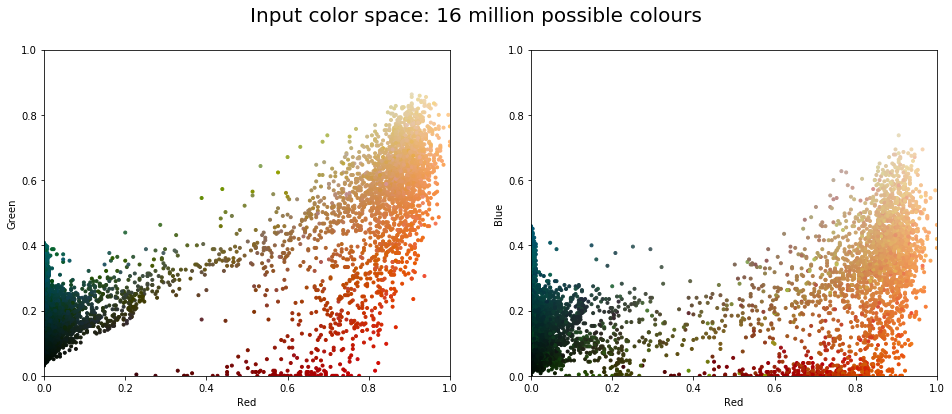

In [33]:
plot_pixels(data, title='Input color space: 16 million possible colours')

#### $k$-means clustering on colours

Now let's reduce these $16$ million colours to just $16$ colours, using a $k$-means clustering across the pixel space. We will use the mini batch $k$-means because of the large dataset.

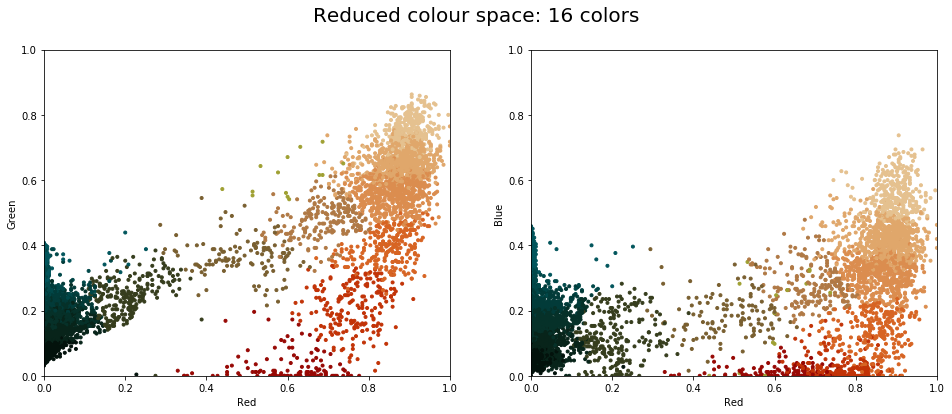

In [34]:
import warnings; warnings.simplefilter('ignore')  # Ignore NumPy issues.

kmeans = # YOUR CODE HERE

new_colors = # YOUR CODE HERE

plot_pixels(data, colors=new_colors,
            title="Reduced colour space: 16 colors")

The result is a re-coloring of the original pixels, where each pixel is assigned the colour of its closest cluster center.

#### Re-plot the compressed image
Plotting these new colours in the image space rather than the pixel space shows us the effect of this.

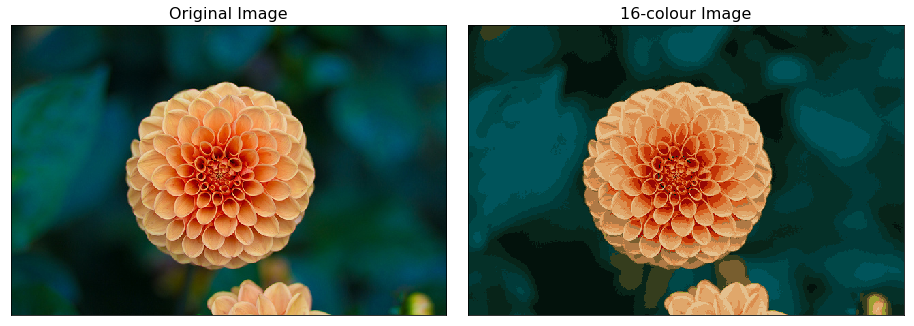

In [35]:
flower_recolored = # YOUR CODE HERE

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-colour Image', size=16);